## Most Common Words

In [2]:
import pandas as pd

In [3]:
data = pd.read_pickle('../../data/pickles/dtm.pickle')
data = data.transpose()
data.head()

,bashou,buson,issa,siki,souseki,ryunosuke,kyoshi,housai,hekigotoh,hisajo
あいさつ,0,0,0,0,0,0,0,1,0,0
あいそ,0,0,2,0,0,0,1,0,0,0
あいだ,1,0,0,0,0,0,0,0,0,0
あか,0,1,1,0,1,0,0,0,0,0
あかし,0,0,0,2,0,1,1,0,0,1


In [4]:
# find the 30 top words
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'bashou': [('ほととぎす', 15),
  ('五月雨', 11),
  ('名月', 10),
  ('しら', 10),
  ('木曾', 9),
  ('しぐれ', 8),
  ('今宵', 8),
  ('郭公', 7),
  ('あはれ', 7),
  ('時雨', 7),
  ('野分', 7),
  ('秋風', 7),
  ('月見', 7),
  ('もの', 6),
  ('須磨', 6),
  ('師走', 6),
  ('富士', 6),
  ('さくら', 6),
  ('はつ', 5),
  ('はん', 5),
  ('けり', 5),
  ('あらし', 5),
  ('ふく', 5),
  ('きりぎりす', 5),
  ('今朝', 5),
  ('一つ', 5),
  ('清水', 5),
  ('五月', 5),
  ('春雨', 5),
  ('やう', 4)],
 'buson': [('もと', 17),
  ('野分', 17),
  ('さくら', 15),
  ('法師', 14),
  ('春雨', 14),
  ('うち', 12),
  ('冬ごもり', 11),
  ('時雨', 11),
  ('若葉', 11),
  ('木立', 11),
  ('牡丹', 10),
  ('ふく', 10),
  ('落葉', 10),
  ('更衣', 10),
  ('清水', 9),
  ('山ざくら', 9),
  ('頭巾', 9),
  ('紅葉', 9),
  ('しき', 9),
  ('ほととぎす', 8),
  ('のち', 8),
  ('夜寒', 8),
  ('あはれ', 8),
  ('むかし', 8),
  ('嵯峨', 8),
  ('短夜', 8),
  ('ひと', 8),
  ('かん', 8),
  ('しぐれ', 8),
  ('ひとつ', 7)],
 'issa': [('はつ', 30),
  ('やう', 19),
  ('時雨', 18),
  ('陽炎', 18),
  ('夜寒', 16),
  ('古郷', 14),
  ('秋風', 14),
  ('うし', 13),
  ('さく', 13),
  ('けり', 13),
  ('時鳥', 1

In [5]:
for haijin, top_words in top_dict.items():
    print(haijin)
    print(' '.join([word for word, count in top_words][:15]))
    print('--------------')

bashou
ほととぎす 五月雨 名月 しら 木曾 しぐれ 今宵 郭公 あはれ 時雨 野分 秋風 月見 もの 須磨
--------------
buson
もと 野分 さくら 法師 春雨 うち 冬ごもり 時雨 若葉 木立 牡丹 ふく 落葉 更衣 清水
--------------
issa
はつ やう 時雨 陽炎 夜寒 古郷 秋風 うし さく けり 時鳥 江戸 雲雀 一つ 五月雨
--------------
siki
名月 野分 上野 落葉 あと 牡丹 五月雨 夕立 清水 燈籠 もの 一つ 秋風 紅葉 夜寒
--------------
souseki
時雨 つて 時鳥 秋風 温泉 清水 一つ 水仙 枯野 紅葉 木立 鶏頭 案山子 白菊 芭蕉
--------------
ryunosuke
夜寒 時雨 秋風 花火 合歓 夏山 もの 今朝 むら 野分 夕立 落葉 屋根 炎天 芥子
--------------
kyoshi
落葉 時雨 もの 紅葉 秋風 野分 牡丹 春雨 一つ 提灯 梅雨 避暑 茶屋 冬日 うち
--------------
housai
つて 一つ 落葉 障子 もの 足音 つた まつ 青空 夕べ 手紙 木槿 師走 大根 病人
--------------
hekigotoh
つて 紅葉 落葉 流れ 温泉 火燵 静か 師走 小春 ぐる 山茶花 一つ 明り 蜻蛉 野分
--------------
hisajo
野菊 若葉 かげ 春潮 蚊帳 牡丹 ごと 障子 春寒 足袋 葡萄 布団 帰省 松葉 火鉢
--------------


In [6]:
# at this point, remove common words used across most haijins
# this process is not must.
# still it is worth trying at least one time.

from collections import Counter

words = []
for haijin in data.columns:
    top = [ word for (word, count) in top_dict[haijin]]
    words += top
    
stop_words = [word for (word, count) in Counter(words).most_common() if count > 5]
stop_words

['時雨', '野分', '一つ', '秋風', '落葉', '紅葉', '夜寒']

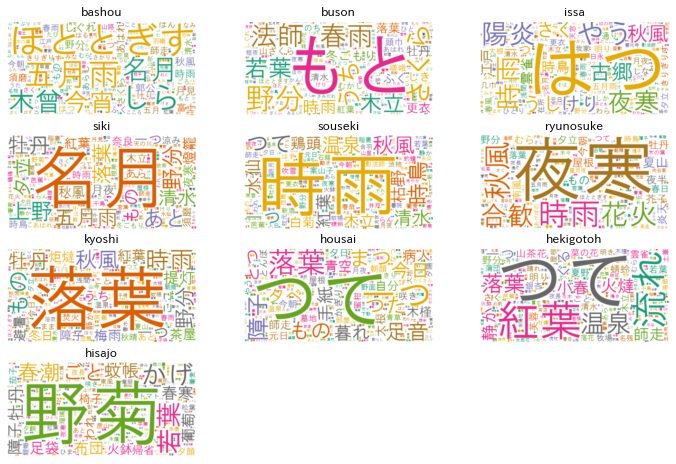

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='HGRGM.TTC', background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams["font.family"] = "IPAexGothic"

grouped = pd.read_pickle('../../data/pickles/grouped.pickle')

for index, haijin in enumerate(data.columns):
    wc.generate(grouped['名詞連結文'].loc[haijin])
    
    plt.subplot(4,3,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(haijin)

plt.savefig('../../data/images/Basyo/wordcloud.png')
plt.show()

## 各俳人における季節別俳句割合

In [10]:
season_df = pd.read_pickle('../../data/pickles/season.pickle')
season_df.head()

,俳句,季語,季節,作者,分かち書き,名詞
0,花の顔に晴うてしてや朧月,花,春,bashou,花 の 顔 に 晴 うて し て や 朧月,花 顔 晴 朧月
1,盛なる梅にす手引風も哉,梅,春,bashou,盛 なる 梅 に す 手引 風 も 哉,盛 梅 手引 風 哉
2,あち東風や面々さばき柳髪,東風,春,bashou,あ ち 東風 や 面々 さばき 柳 髪,東風 面々 さばき 柳 髪
3,餅雪をしら糸となす柳哉,餅,冬,bashou,餅 雪 を しら 糸 と なす 柳 哉,餅 雪 しら 糸 柳 哉
4,花にあかぬ嘆やこちのうたぶくろ,花,春,bashou,花 に あか ぬ 嘆 や こ ちの う たぶ くろ,花 嘆 こ ちの


In [11]:
def season_sort(s_dict):
    ''' 
    sort by season order 
    '''
    seasons = ['新年', '春', '夏', '秋', '冬']
    sorted_dict = {}
    for s in seasons:
        rate = s_dict[s]
        sorted_dict.setdefault(s, rate)
        
    return sorted_dict

rates_dict = {}


for haijin, group in season_df.groupby('作者'):
    print(haijin)
    total = group.shape[0]
    tmp_dict = {}
    for season, s_group in group.groupby('季節'):
        s_count = s_group.shape[0]
        rate = int(round(s_count/total, 2)*100)
        tmp_dict.setdefault(season, rate)
        print(season, s_count, '{}%'.format(rate))
    rates_dict.setdefault(haijin, season_sort(tmp_dict))
    print('-------------')

bashou
冬 132 18%
夏 145 20%
新年 12 2%
春 192 27%
秋 235 33%
-------------
buson
冬 178 18%
夏 236 24%
新年 6 1%
春 285 28%
秋 293 28%
-------------
hekigotoh
冬 229 23%
夏 235 24%
新年 14 1%
春 223 23%
秋 278 28%
-------------
hisajo
冬 107 14%
夏 195 26%
新年 11 1%
春 216 28%
秋 235 31%
-------------
housai
冬 87 37%
夏 45 19%
新年 6 3%
春 39 17%
秋 56 24%
-------------
issa
冬 204 19%
夏 264 25%
新年 27 3%
春 303 28%
秋 261 25%
-------------
kyoshi
冬 628 20%
夏 848 26%
新年 26 1%
春 816 25%
秋 893 28%
-------------
ryunosuke
冬 67 17%
夏 134 33%
新年 2 0%
春 56 14%
秋 143 36%
-------------
siki
冬 332 16%
夏 516 26%
新年 25 1%
春 332 16%
秋 808 40%
-------------
souseki
冬 263 28%
夏 180 20%
新年 28 3%
春 41 4%
秋 401 44%
-------------


In [12]:
rates_dict

{'bashou': {'新年': 2, '春': 27, '夏': 20, '秋': 33, '冬': 18},
 'buson': {'新年': 1, '春': 28, '夏': 24, '秋': 28, '冬': 18},
 'hekigotoh': {'新年': 1, '春': 23, '夏': 24, '秋': 28, '冬': 23},
 'hisajo': {'新年': 1, '春': 28, '夏': 26, '秋': 31, '冬': 14},
 'housai': {'新年': 3, '春': 17, '夏': 19, '秋': 24, '冬': 37},
 'issa': {'新年': 3, '春': 28, '夏': 25, '秋': 25, '冬': 19},
 'kyoshi': {'新年': 1, '春': 25, '夏': 26, '秋': 28, '冬': 20},
 'ryunosuke': {'新年': 0, '春': 14, '夏': 33, '秋': 36, '冬': 17},
 'siki': {'新年': 1, '春': 16, '夏': 26, '秋': 40, '冬': 16},
 'souseki': {'新年': 3, '春': 4, '夏': 20, '秋': 44, '冬': 28}}

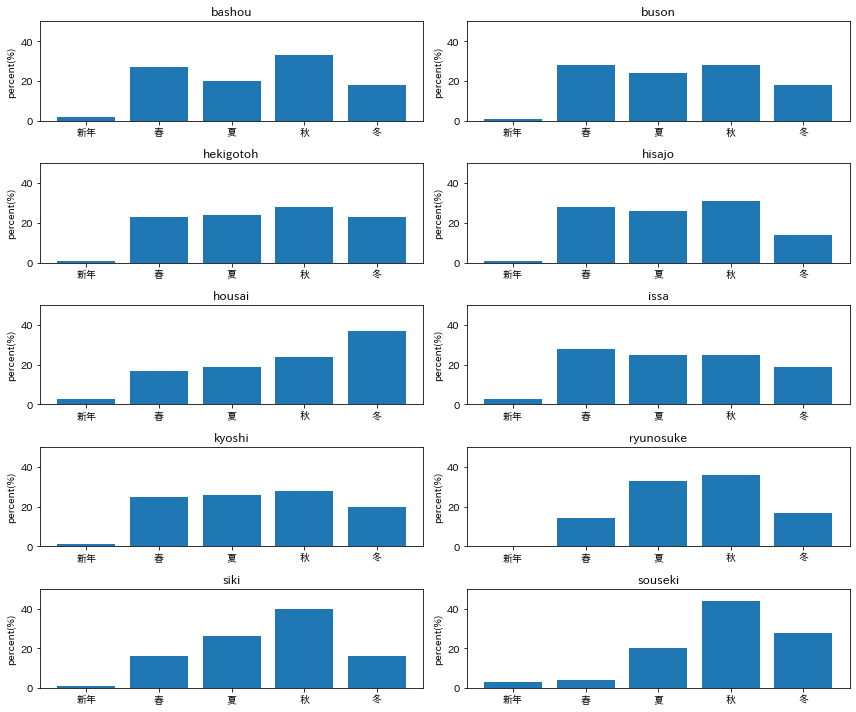

In [13]:
import matplotlib.pyplot as plt 

seasons = ['新年', '春', '夏', '秋', '冬']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10))


for index, (key, value) in enumerate(rates_dict.items()):
    rates = value.values()
    axes[index//2, index%2].bar(seasons, rates)
    axes[index//2, index%2].set_ylim(0, 50)
    axes[index//2, index%2].set_title(key)
    axes[index//2, index%2].set_ylabel('percent(%)')
fig.tight_layout()
plt.savefig("../../data/images/Basyo/season_ratio.png")
plt.show()

#### 気づき
- 漱石のデータは偏った分布をしている。
- 新年の句は少ない
- 大方、春夏秋冬同じ数になっている
